<h3> importing libraries</h3>

In [1]:
from scipy.stats import norm
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> given script for generating data</h3>

In [ ]:

id_1 = 0000 #change to first student id
id_2 = 0000 #change to second student id
id_3 = 0000 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="data.csv"#replace with data path
output_path="your_data.csv"#replace with output data path

all_data=pd.read_csv(data_path) 
all_columns = all_data.columns.tolist()

target_column = 'smoking'  

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST

<h3>read data</h3>

In [2]:
data=pd.read_csv("your_data.csv")
data.head()

,Unnamed: 0,Cholesterol,triglyceride,age,hearing(right),hemoglobin,LDL,dental caries,systolic,hearing(left),eyesight(left),smoking
0,0,172,300,55,1,16.5,75,0,135,1,0.5,1
1,1,194,55,70,2,16.2,126,1,146,2,0.6,0
2,2,178,197,20,1,17.4,93,0,118,1,0.4,1
3,3,180,203,35,1,15.9,102,1,131,1,1.5,0
4,4,155,87,30,1,15.4,93,0,121,1,1.5,1


In [3]:
data.describe()

,Unnamed: 0,Cholesterol,triglyceride,age,hearing(right),hemoglobin,LDL,dental caries,systolic,hearing(left),eyesight(left),smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,195.796165,127.616046,44.306626,1.023421,14.796965,114.607682,0.197996,122.503648,1.023974,1.005798,0.437365
std,45973.391572,28.396959,66.188989,11.842286,0.151238,1.431213,28.158931,0.398490,12.729315,0.152969,0.402113,0.496063
min,0.000000,77.000000,8.000000,20.000000,1.000000,4.900000,1.000000,0.000000,77.000000,1.000000,0.100000,0.000000
25%,39813.750000,175.000000,77.000000,40.000000,1.000000,13.800000,95.000000,0.000000,114.000000,1.000000,0.800000,0.000000
50%,79627.500000,196.000000,115.000000,40.000000,1.000000,15.000000,114.000000,0.000000,121.000000,1.000000,1.000000,0.000000
75%,119441.250000,217.000000,165.000000,55.000000,1.000000,15.800000,133.000000,0.000000,130.000000,1.000000,1.200000,1.000000
max,159255.000000,393.000000,766.000000,85.000000,2.000000,21.000000,1860.000000,1.000000,213.000000,2.000000,9.900000,1.000000


<h4> univariate data analysis</h4>

In [4]:

non_smoking=data.loc[data['smoking']==0]
smoking=data.loc[data['smoking']==1]
print(non_smoking.shape)
print(smoking.shape)
print((non_smoking.shape[0]-smoking.shape[0])/(smoking.shape[0]))

(89603, 12)
(69653, 12)
0.2864198239846094


<p> number of non smokers in the dataset is more than number of smokers with about 28%</p>

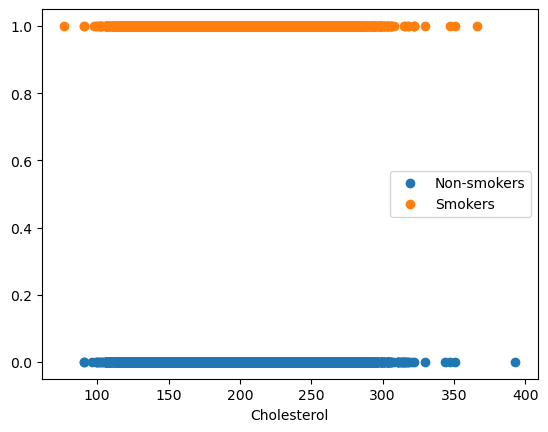

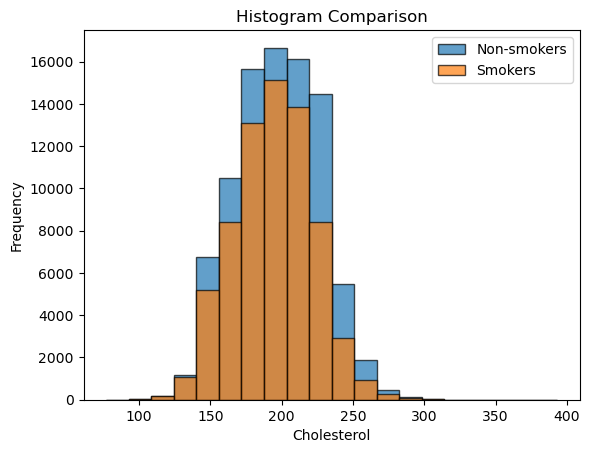

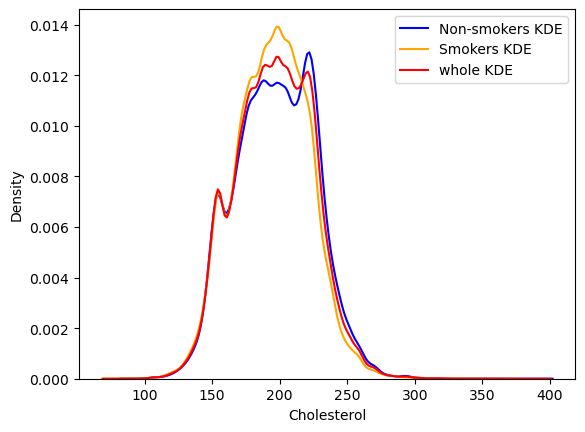

In [5]:
#cholesterol
plt.plot(non_smoking['Cholesterol'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['Cholesterol'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Cholesterol')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['Cholesterol']), min(smoking['Cholesterol'])),
                max(max(non_smoking['Cholesterol']), max(smoking['Cholesterol'])))
plt.hist(non_smoking['Cholesterol'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')

plt.hist(smoking['Cholesterol'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')

plt.legend()
plt.show()
sns.kdeplot(non_smoking['Cholesterol'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['Cholesterol'], color='orange', label='Smokers KDE')
sns.kdeplot(data['Cholesterol'], color='red', label='whole KDE')
plt.xlabel('Cholesterol')
plt.ylabel('Density') 


plt.legend()
plt.show()

<h4> observation</h4>
<p>smokers and non smokers nearly have the same distribution and the diffrences because non smokers number of samples is more</p>

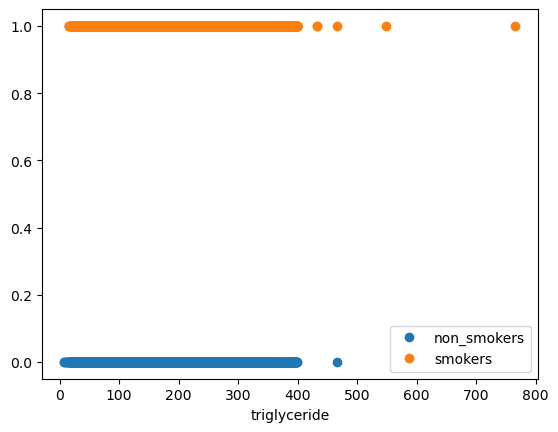

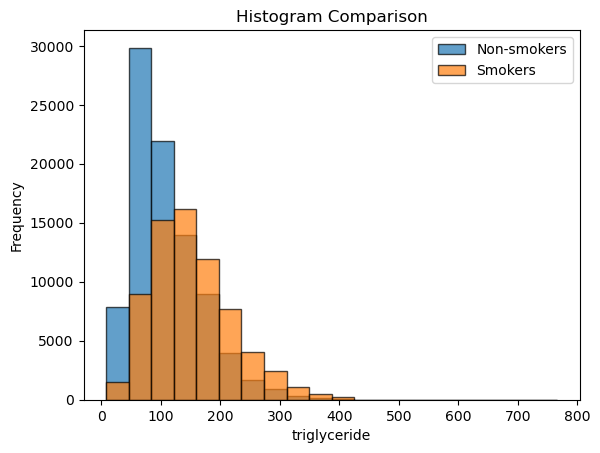

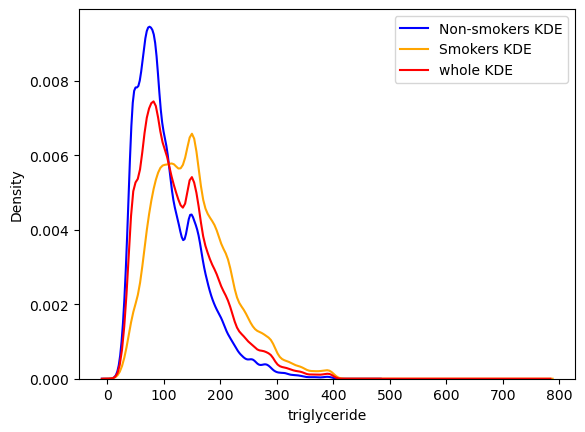

In [6]:
#triglyceride
plt.plot(non_smoking['triglyceride'],np.zeros(len(non_smoking)), 'o',label='non_smokers')
plt.plot(smoking['triglyceride'],np.ones(len(smoking)), 'o',label='smokers')
plt.xlabel('triglyceride')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['triglyceride']), min(smoking['triglyceride'])),
                max(max(non_smoking['triglyceride']), max(smoking['triglyceride'])))
plt.hist(non_smoking['triglyceride'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['triglyceride'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('triglyceride')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['triglyceride'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['triglyceride'], color='orange', label='Smokers KDE')
sns.kdeplot(data['triglyceride'], color='red', label='whole KDE')
plt.xlabel('triglyceride')
plt.ylabel('Density') 


plt.legend()
plt.show()

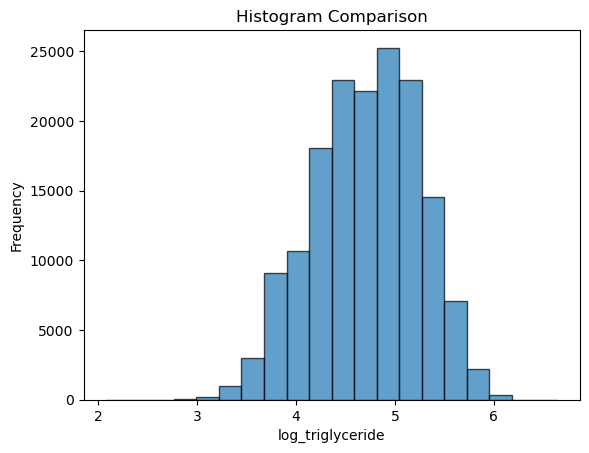

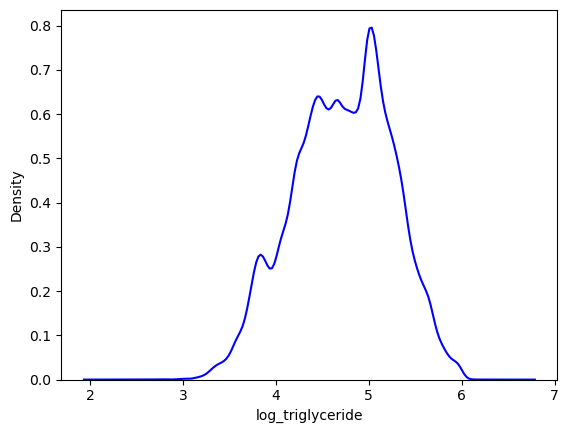

In [7]:
#try log function because distribution is skewed
#triglyceride
data['log_triglyceride']=np.log(data['triglyceride'])

plt.hist(data['log_triglyceride'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_triglyceride')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_triglyceride'], color='blue')
plt.xlabel('log_triglyceride')
plt.ylabel('Density') 
plt.show()

<p>log function has a better distribution</p>
<h4> observation</h4>
<p>non smoker are more concentrated in the left of the histogram and smokers have higher percentage after 100</p>

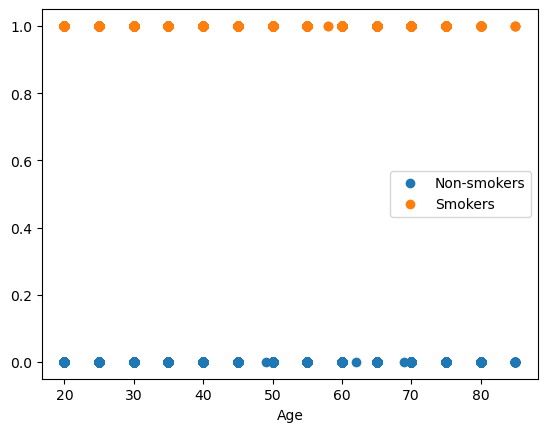

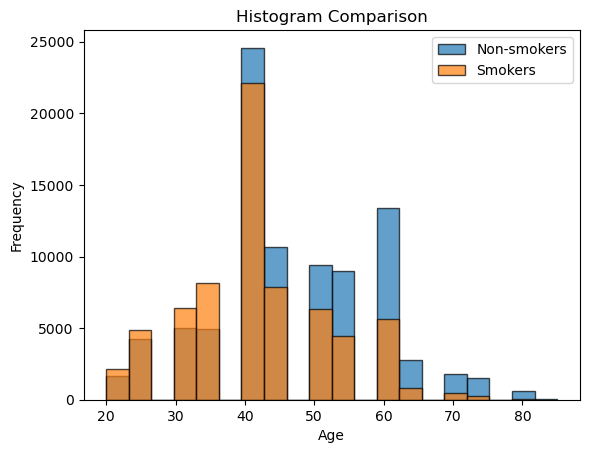

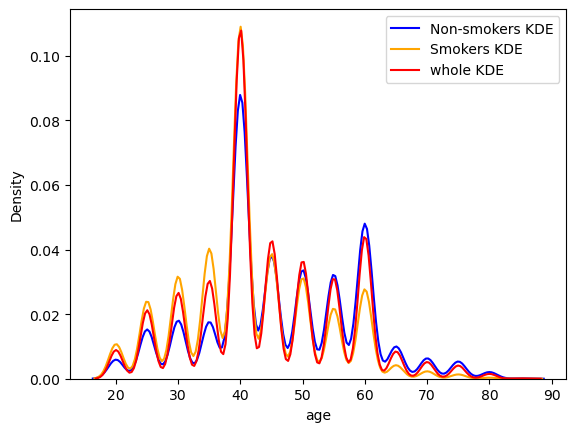

In [8]:
# age
plt.plot(non_smoking['age'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['age'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Age')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['age']), min(smoking['age'])),
                max(max(non_smoking['age']), max(smoking['age'])))
plt.hist(non_smoking['age'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['age'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['age'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['age'], color='orange', label='Smokers KDE')
sns.kdeplot(data['age'], color='red', label='whole KDE')
plt.xlabel('age')
plt.ylabel('Density') 


plt.legend()
plt.show()

<h4> observation</h4>
<p>smokers have higher percentage in the ages less than 40</p>

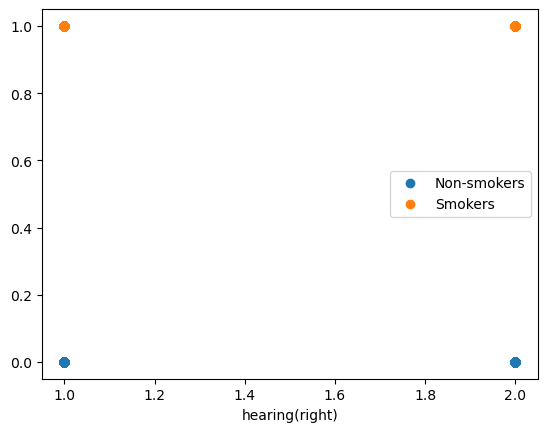

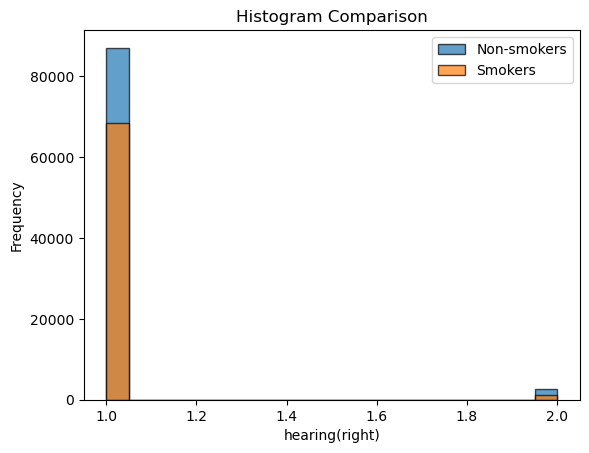

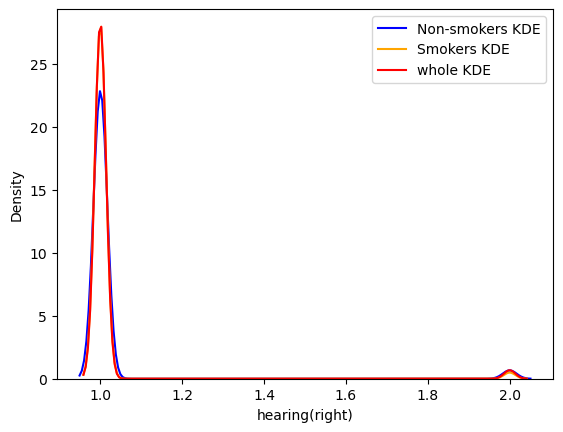

In [9]:
# hearing(right)
plt.plot(non_smoking['hearing(right)'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['hearing(right)'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('hearing(right)')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['hearing(right)']), min(smoking['hearing(right)'])),
                max(max(non_smoking['hearing(right)']), max(smoking['hearing(right)'])))
plt.hist(non_smoking['hearing(right)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['hearing(right)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('hearing(right)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['hearing(right)'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['hearing(right)'], color='orange', label='Smokers KDE')
sns.kdeplot(data['hearing(right)'], color='red', label='whole KDE')
plt.xlabel('hearing(right)')
plt.ylabel('Density') 


plt.legend()
plt.show()

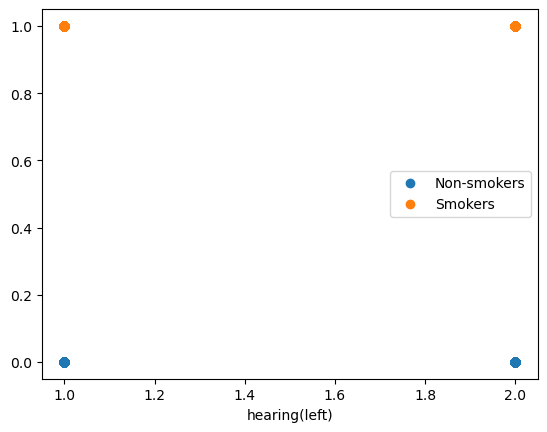

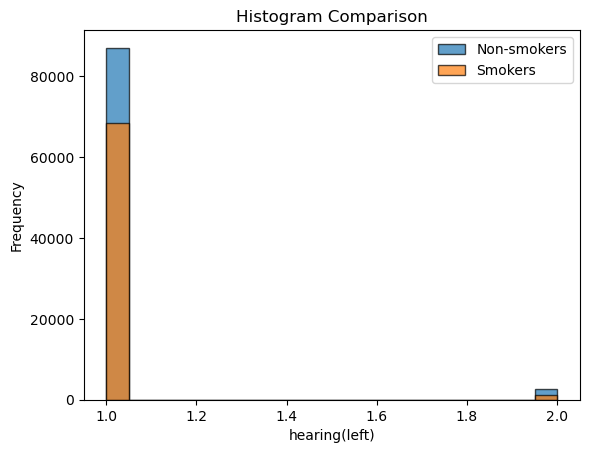

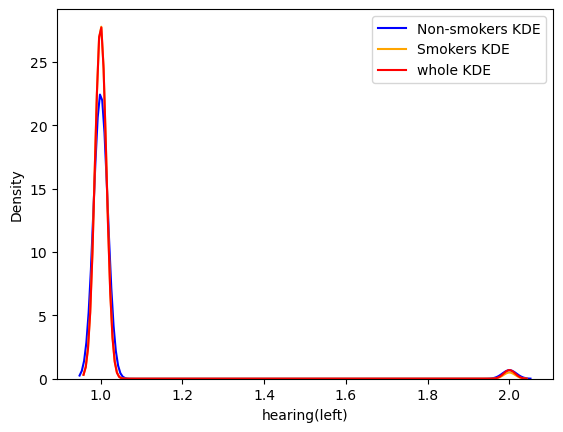

In [10]:
# hearing(left)
plt.plot(non_smoking['hearing(left)'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['hearing(left)'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('hearing(left)')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['hearing(left)']), min(smoking['hearing(left)'])),
                max(max(non_smoking['hearing(left)']), max(smoking['hearing(left)'])))
plt.hist(non_smoking['hearing(left)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['hearing(left)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('hearing(left)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['hearing(left)'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['hearing(left)'], color='orange', label='Smokers KDE')
sns.kdeplot(data['hearing(left)'], color='red', label='whole KDE')
plt.xlabel('hearing(left)')
plt.ylabel('Density') 


plt.legend()
plt.show()

<h4> observation</h4>
<p>have nearly the same distribution like hearing(right)</p>

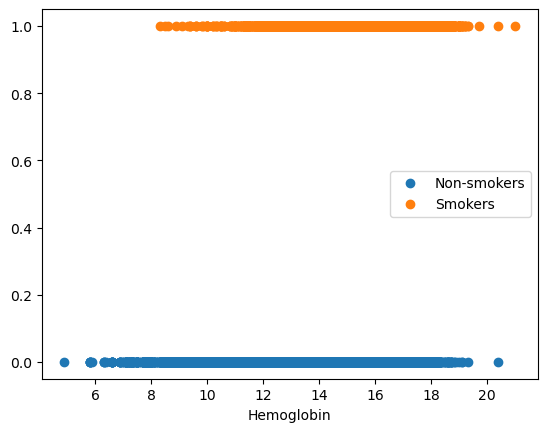

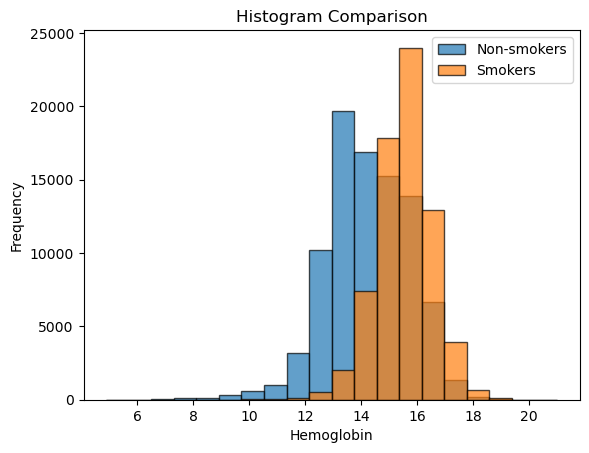

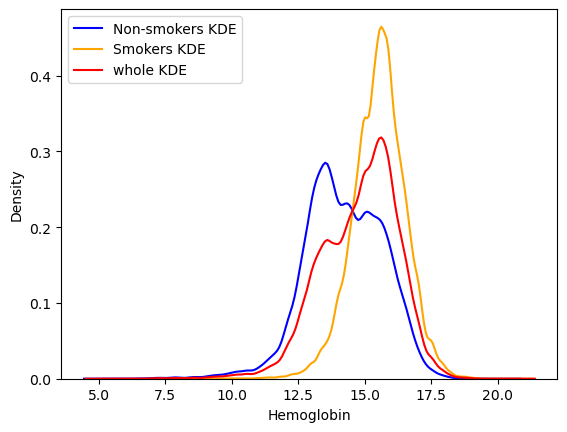

In [11]:
# hemoglobin
plt.plot(non_smoking['hemoglobin'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['hemoglobin'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Hemoglobin')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['hemoglobin']), min(smoking['hemoglobin'])),
                max(max(non_smoking['hemoglobin']), max(smoking['hemoglobin'])))

plt.hist(non_smoking['hemoglobin'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['hemoglobin'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Hemoglobin')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['hemoglobin'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['hemoglobin'], color='orange', label='Smokers KDE')
sns.kdeplot(data['hemoglobin'], color='red', label='whole KDE')
plt.xlabel('Hemoglobin')
plt.ylabel('Density') 


plt.legend()
plt.show()

In [ ]:
#try log because distribution is skewed
data['log_hemoglobin']=np.log(data['hemoglobin'])

plt.hist(data['log_hemoglobin'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_hemoglobin')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_hemoglobin'], color='blue')
plt.xlabel('log_hemoglobin')
plt.ylabel('Density') 
plt.show()


<p>no diffrence between log function dis. and feature distribution</p>
<h4> observation</h4>
<p>smokers have higher percentage with levels of hemoglobin more than 14 </p>

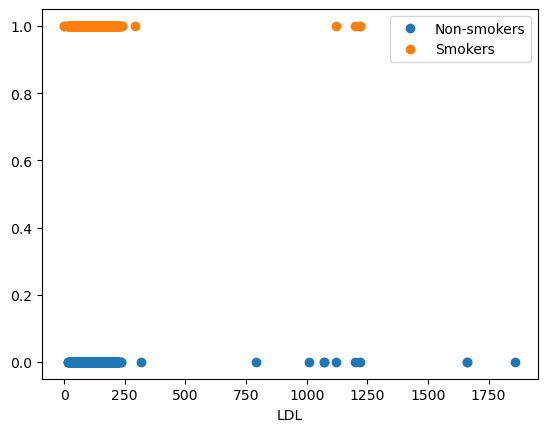

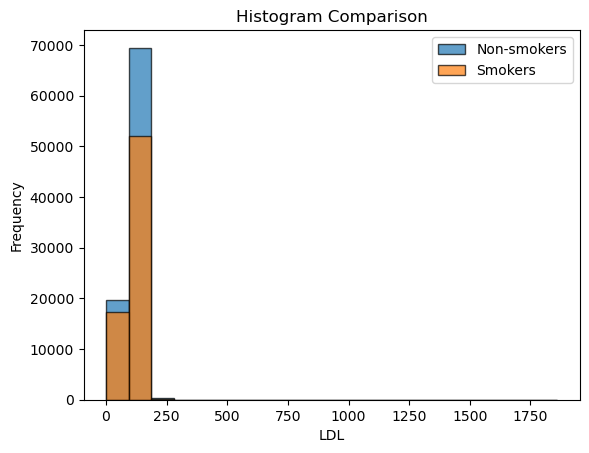

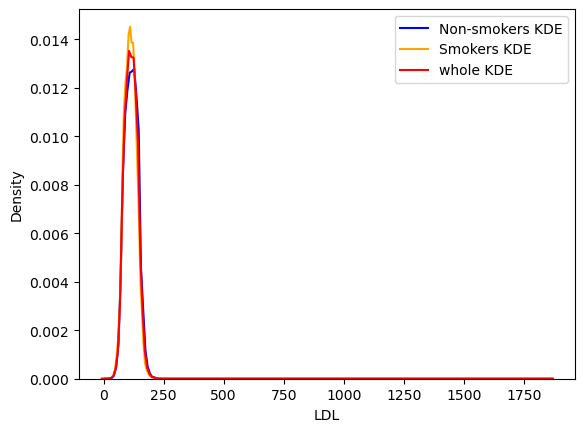

In [12]:
#LDL
plt.plot(non_smoking['LDL'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['LDL'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('LDL')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['LDL']), min(smoking['LDL'])),
                max(max(non_smoking['LDL']), max(smoking['LDL'])))

plt.hist(non_smoking['LDL'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['LDL'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('LDL')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['LDL'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['LDL'], color='orange', label='Smokers KDE')
sns.kdeplot(data['LDL'], color='red', label='whole KDE')
plt.xlabel('LDL')
plt.ylabel('Density') 


plt.legend()
plt.show()

In [ ]:
#try log because distribution is skewed
data['log_LDL']=np.log(data['LDL'])

plt.hist(data['log_LDL'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_LDL')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_LDL'], color='blue')
plt.xlabel('log_LDL')
plt.ylabel('Density') 
plt.show()

<p>no diffrence between log function dis. and feature distribution</p>

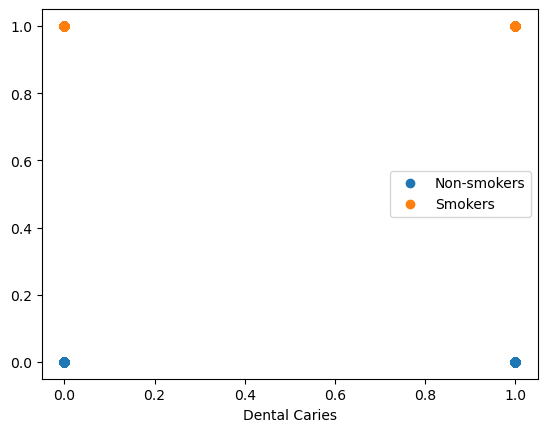

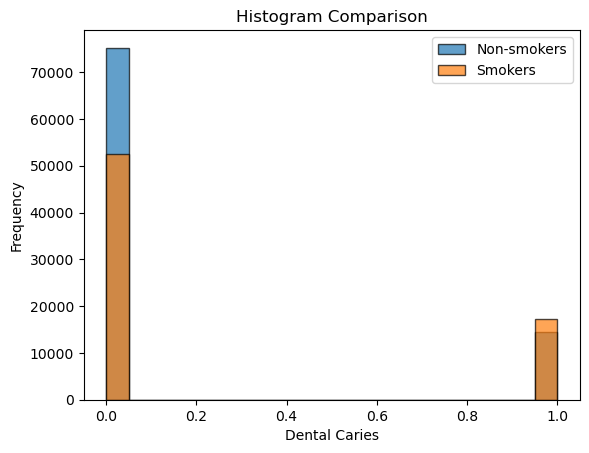

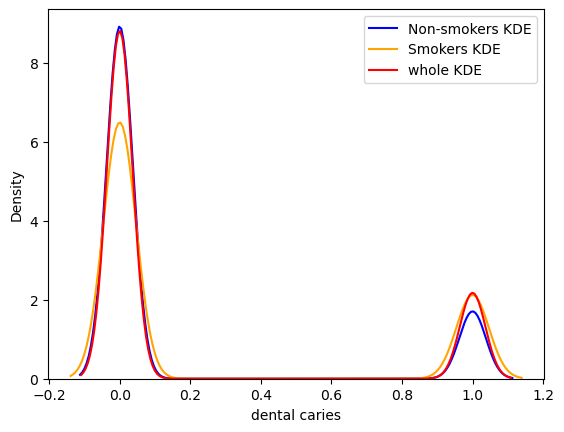

In [13]:
# dental caries
plt.plot(non_smoking['dental caries'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['dental caries'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Dental Caries')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['dental caries']), min(smoking['dental caries'])),
                max(max(non_smoking['dental caries']), max(smoking['dental caries'])))

plt.hist(non_smoking['dental caries'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['dental caries'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Dental Caries')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['dental caries'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['dental caries'], color='orange', label='Smokers KDE')
sns.kdeplot(data['dental caries'], color='red', label='whole KDE')
plt.xlabel('dental caries')
plt.ylabel('Density') 


plt.legend()
plt.show()

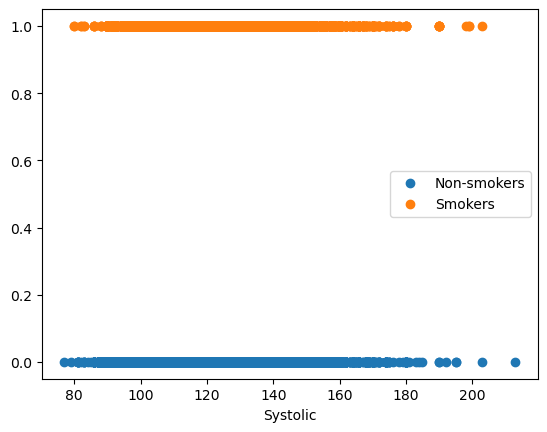

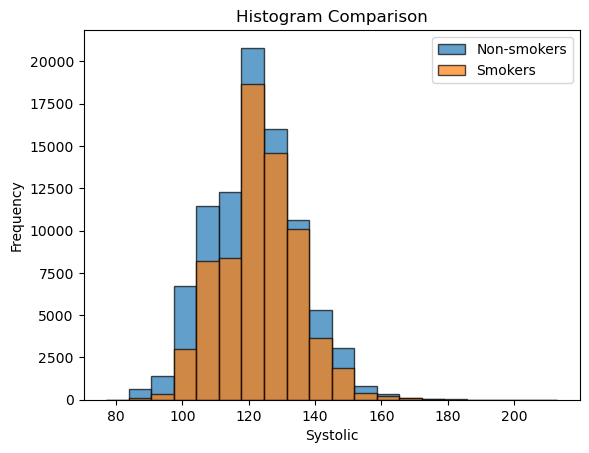

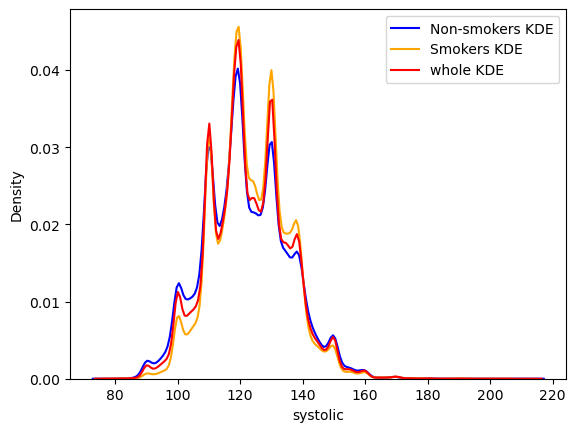

In [14]:
# systolic
plt.plot(non_smoking['systolic'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['systolic'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Systolic')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['systolic']), min(smoking['systolic'])),
                max(max(non_smoking['systolic']), max(smoking['systolic'])))

plt.hist(non_smoking['systolic'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['systolic'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Systolic')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['systolic'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['systolic'], color='orange', label='Smokers KDE')
sns.kdeplot(data['systolic'], color='red', label='whole KDE')
plt.xlabel('systolic')
plt.ylabel('Density') 


plt.legend()
plt.show()

In [ ]:
#try log because distribution is skewed
data['log_systolic']=np.log(data['systolic'])

plt.hist(data['log_systolic'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_systolic')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_systolic'], color='blue')
plt.xlabel('log_systolic')
plt.ylabel('Density') 
plt.show()

<p>no diffrence between log function dis. and feature distribution</p>

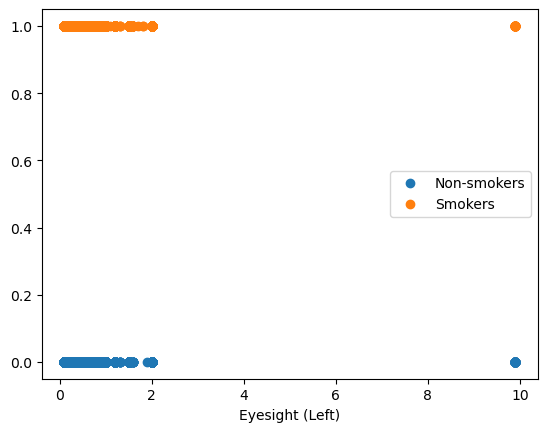

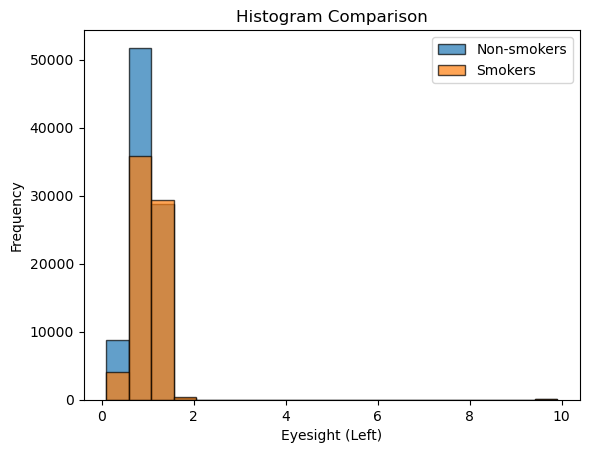

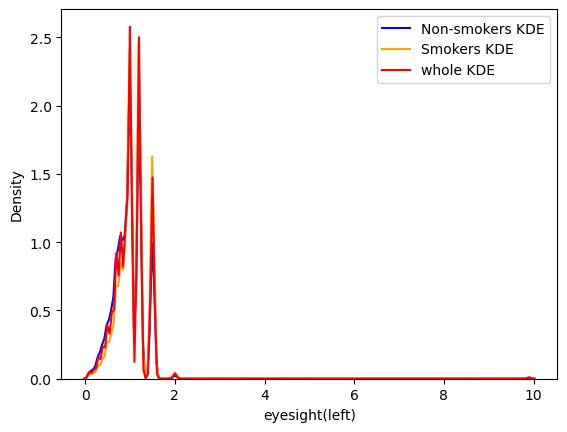

In [15]:
# eyesight(left)
plt.plot(non_smoking['eyesight(left)'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['eyesight(left)'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Eyesight (Left)')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['eyesight(left)']), min(smoking['eyesight(left)'])),
                max(max(non_smoking['eyesight(left)']), max(smoking['eyesight(left)'])))

plt.hist(non_smoking['eyesight(left)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['eyesight(left)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Eyesight (Left)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['eyesight(left)'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['eyesight(left)'], color='orange', label='Smokers KDE')
sns.kdeplot(data['eyesight(left)'], color='red', label='whole KDE')
plt.xlabel('eyesight(left)')
plt.ylabel('Density') 


plt.legend()
plt.show()

In [ ]:
#try log because distribution is skewed
data['log_eyesight(left)']=np.log(data['eyesight(left)'])

plt.hist(data['log_eyesight(left)'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_eyesight(left)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_eyesight(left)'], color='blue')
plt.xlabel('log_eyesight(left)')
plt.ylabel('Density') 
plt.show()

<h3> bivariate data analysis</h3>
<p>correlation analysis to quantify the strength and direction of the linear relationship between two variables</p>

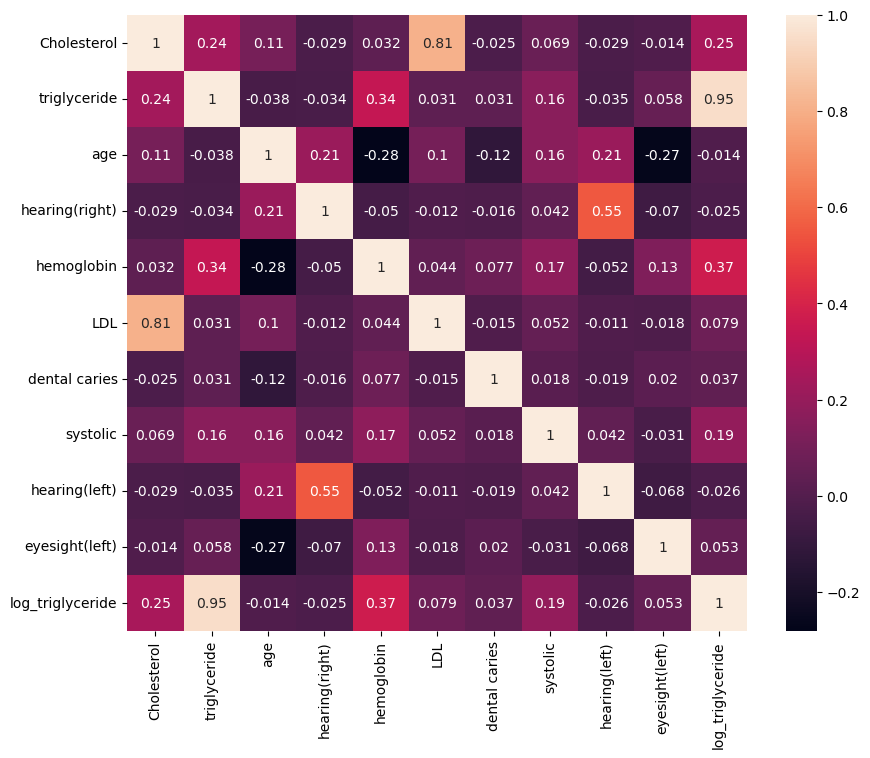

In [16]:


features=data.drop(['smoking'],axis=1)
features =features.drop(data.columns[0], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(),annot=True)
plt.show()

<h4> observation</h4>
<p>hearing left is modeicorly correlated with hearing right</p>
<p>LDL is highly correlated with chelosterol</p>
<p> age have an effect on hemoglibin eyesight(left) hearing left and right</p>

<h3>multivariate analysis</h3>

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

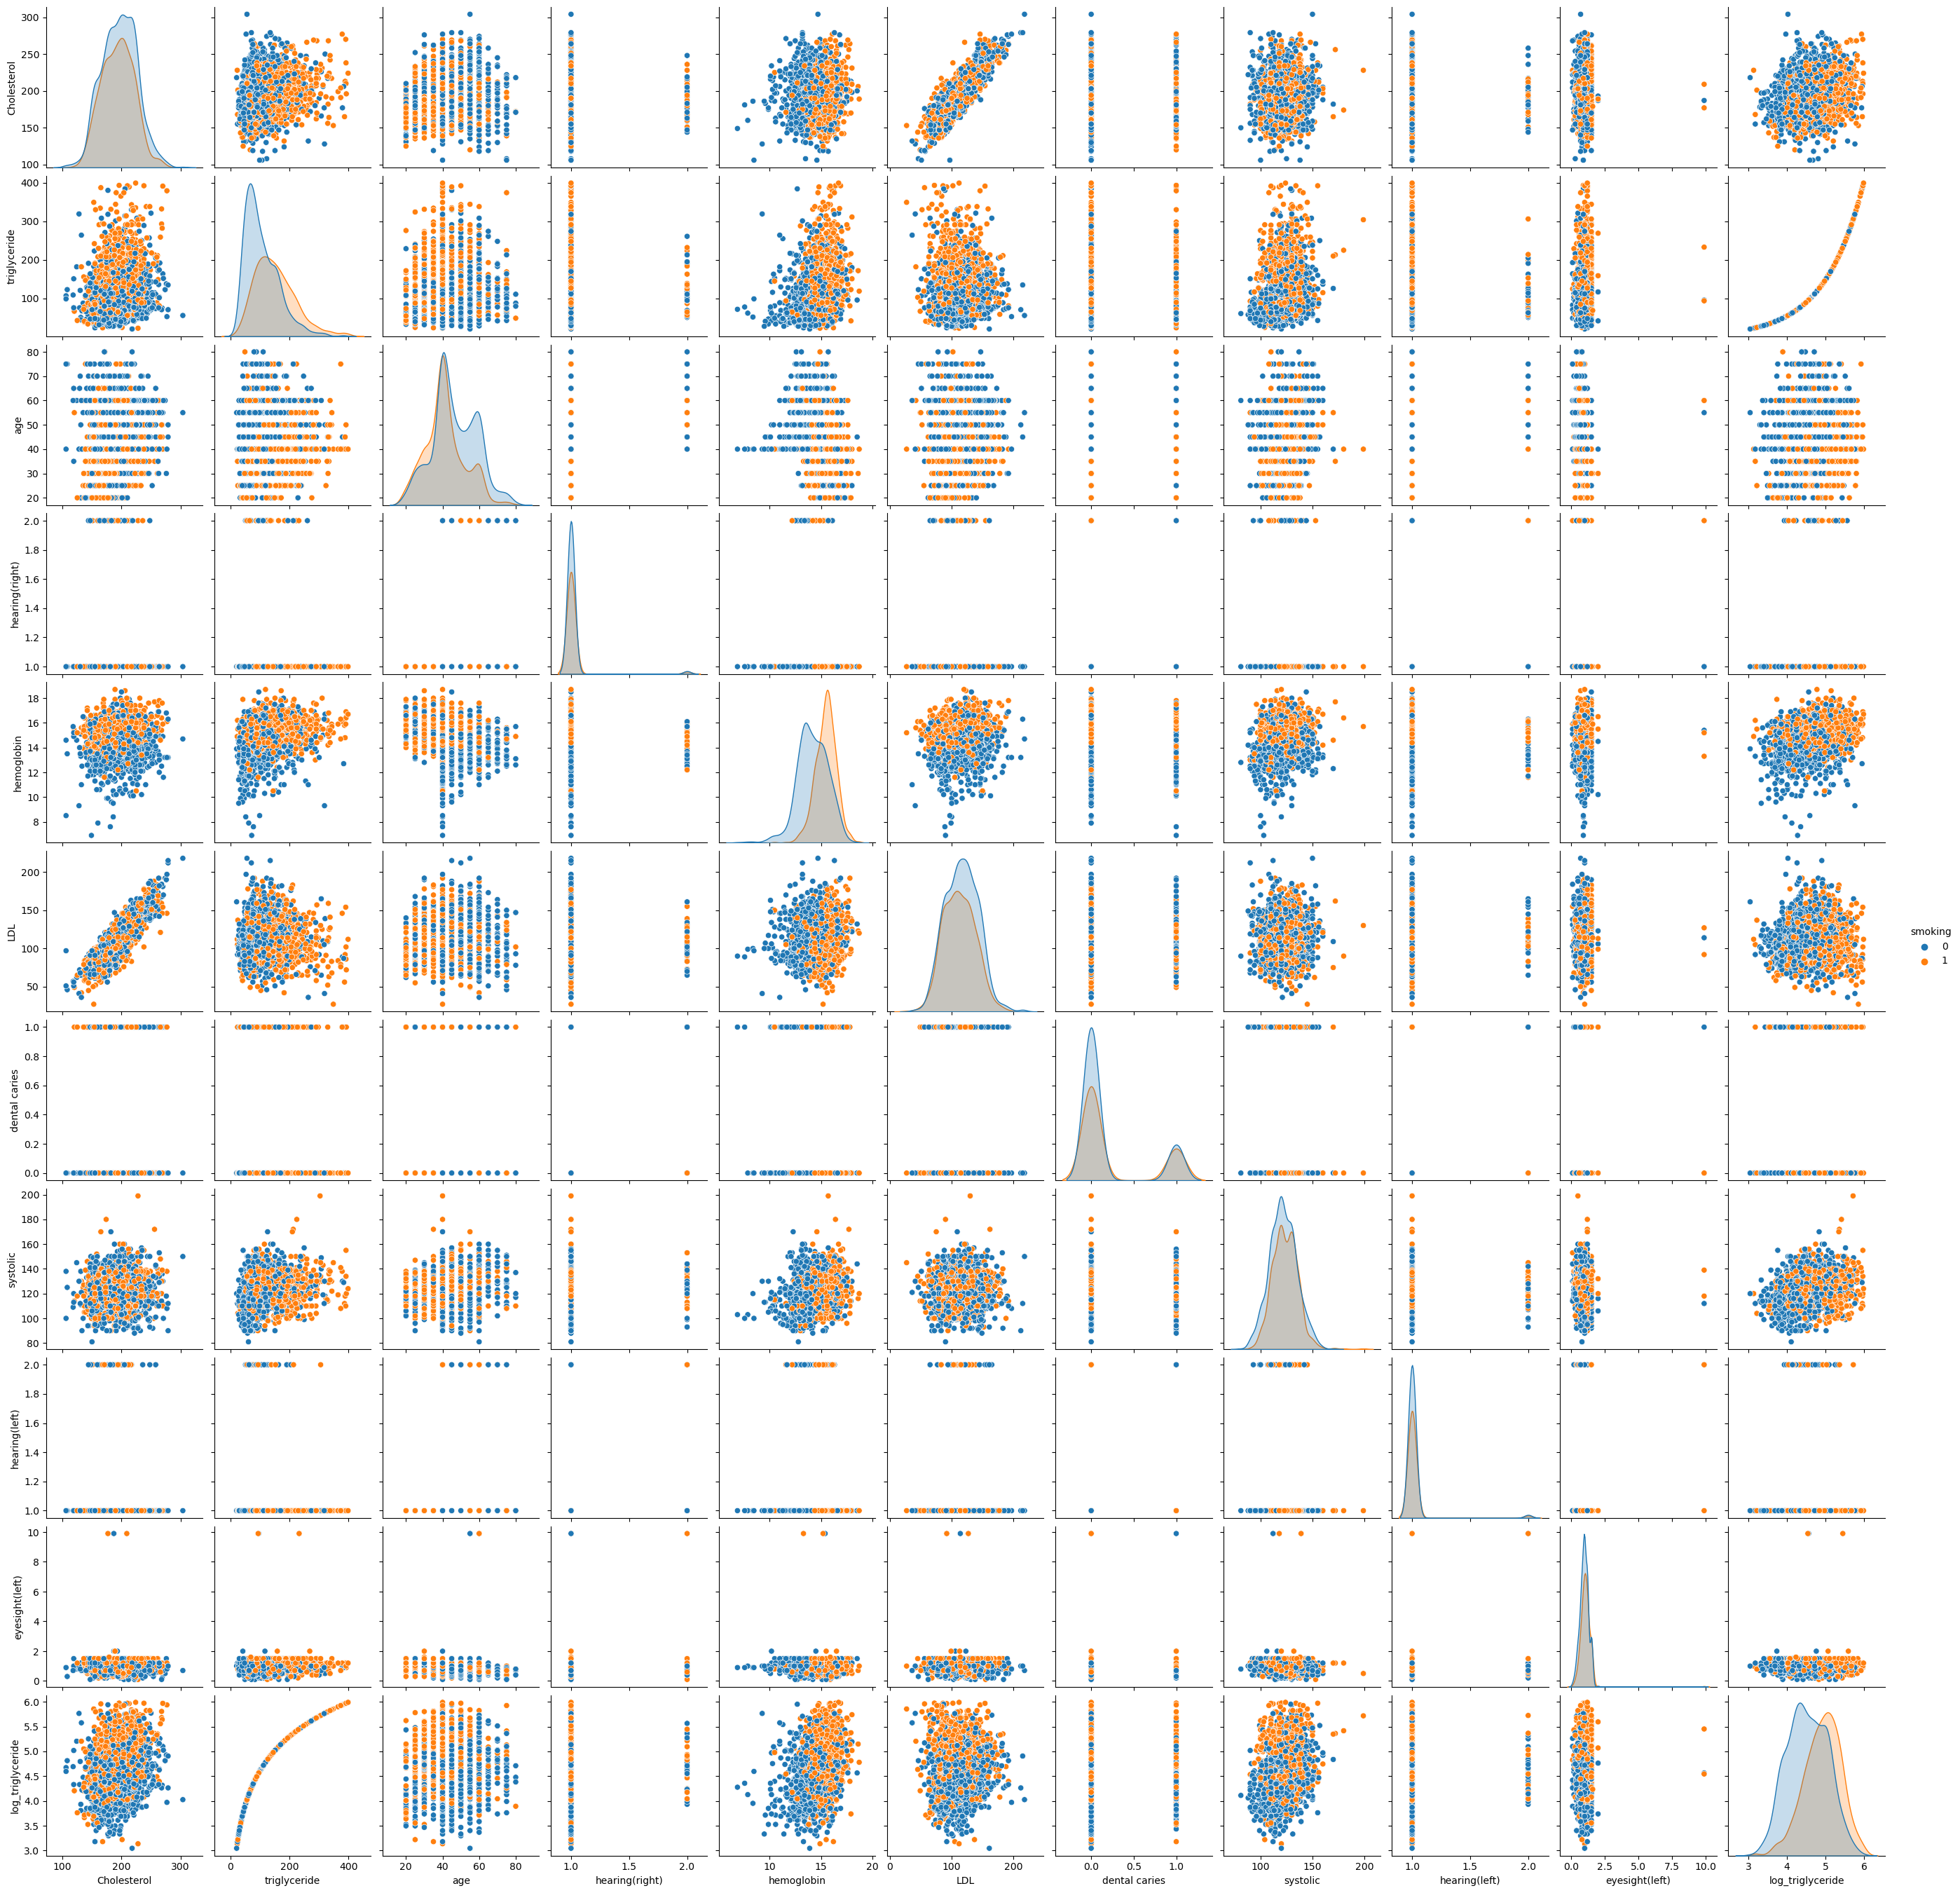

In [17]:
subset_data = data.sample(n=2000)
plt.figure(figsize=(30, 30))
sns.pairplot(subset_data.drop(subset_data.columns[0], axis=1), hue='smoking')
plt.show()